# 비선형 SVM

## 선형 SVM 분류의 한계
    - 모든 데이터들을 선형적으로 분류할 수 있는 것은 아니다

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp
import sklearn.svm as svm

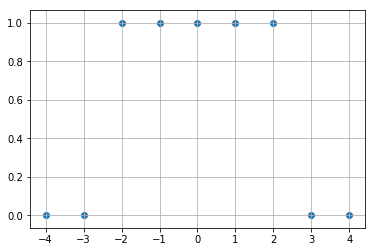

In [42]:
X = np.linspace(-4,4,9).reshape(-1,1)
y = np.array([0,0,1,1,1,1,1,0,0])

plt.scatter(X,y)
plt.grid()
plt.show()

## 비선형 데이터의 특성 확장
### 비선형 데이터의 특성을 다항식 형태로 변환하면 선형적으로 구분이 가능하게 될 수 있다

In [43]:
poly = pp.PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_poly

array([[ 1., -4., 16.],
       [ 1., -3.,  9.],
       [ 1., -2.,  4.],
       [ 1., -1.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

## 비선형 데이터의 특성 확장 후 선형 SVM 분류
### 다음과 같은 비선형 데이터에 대해서 선형 SVM을 수행

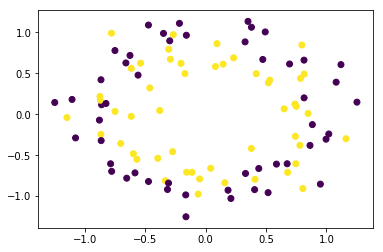

In [44]:
import sklearn.datasets as d
X, y = d.make_circles(noise=0.15,
                      n_samples=100,
                      random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

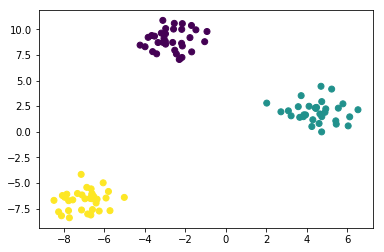

In [45]:
import sklearn.datasets as d
X, y = d.make_blobs(n_samples=100,
                    random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

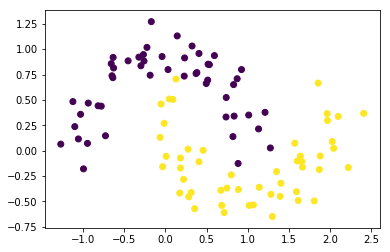

In [46]:
import sklearn.datasets as d
X,y = d.make_moons(noise=0.15,
                   n_samples=100,
                   random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

### 비선형 데이터를 그대로 이용하여 분류한 결과는 좋지 않다

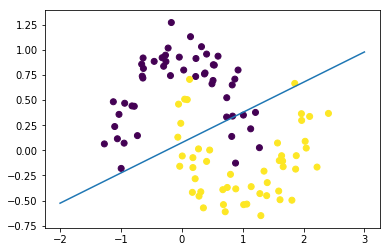

In [50]:
clf = svm.SVC(C=10, kernel='linear').fit(X,y)

xx = np.linspace(-2.0,3.0)
yy = -(clf.coef_[0][0] / clf.coef_[0][1]) * xx - clf.intercept_ / clf.coef_[0][1]

plt.plot(xx,yy)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

### 데이터의 특성을 다항식 형태로 변환한 뒤, 선형 SVM 분류를 수행

In [51]:
poly = pp.PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
clf = svm.SVC(C=10,kernel='linear').fit(X_poly,y)

In [53]:
# yy = -(clf.coef_[0][0] / clf.coef_[0][1]) * xx - clf.intercept_ / clf.coef_[0][1]

## 결정 경계와 예측값의 관계
- 예측값은 `predict` 메소드를 호출하여 반환되는 결과이며, 이진 분류에서는 0 또는 1로 도출
- 결정 경계에 대해 적용한 값은 `decision_function` 메소드를 호출하여 반환되는 결과이며,그 값의 부호에 따라 예측값이 결정됨
- 결과 값이 양수이면 결정 경계의 위(양성 초평면 상)에 존재한다는 의미이다. 따라서 예측값은 1
- 결과 값이 음수이면 결정 경계의 아래(음성 초평면 상)에 존재한다는 의미이다. 따라서 예측값은 0
- 어떤 데이터에 대한 decision_function 메소드의 반환 값은 그 데이터가 어떤 초평면 상에 있는지 판단의 근거가 된다

In [55]:
X_new = np.array([[1, -0.5],
                  [1,0],
                  [1, 0.5]])
X_new_poly = poly.fit_transform(X_new)

In [56]:
y_new_pred = clf.predict(X_new_poly)
y_new_pred

array([1, 0, 0])

In [58]:
y_new_decision = clf.decision_function(X_new_poly)
np.round(y_new_decision,3)

array([ 1.842, -0.752, -2.676])

## 참고: 비선형 분류 결정 경계의 플롯 표현 예

### 비선형 SVM 분류 결정 경계의 플롯

- 가로축(X)과 세로축(Y)의 각 좌표들마다 높이축(Z) 값이 존재할 때, 이 데이터를 3차원 육면체가 아니라 2차원 평면 상에서 등고선으로 그리거나 등고선의 내부를 채워서 높이 축의 값을 표현할 수 있다.
    - pyplot의 contour 함수를 이용하여 등고선을 그린다.
    - pyplot의 contourf 함수를 이용하여 등고선의 내부를 채운다.
- 이 함수를 이용하여 결정 경계 곡선을 표시하겠다는 것이 핵심 발상
- 가로축(X)과 세로축(Y)의 각 좌표들마다 높이축(Z) 값이 존재할 때, 이 데이터를 3차원 육면체가 아니라 2차원 평면 상에서 등고선으로 그리거나 등고선의 내부를 채워서 높이 축의 값을 표현
- 전체 과정의 예제 구문은 별도의 참고 자료 “참고) 비선형분류_결정경계의_플롯표현_예” 파일의 내용을 확인

In [59]:
# 비선형 데이터를 준비하고 다항 특성 확장을 한 뒤 분류를 수행한다.
# (강의자료 5페이지 및 7페이지의 구문들과 완전히 동일한 것을 다시 쓴 것이다.)

import sklearn.datasets as d
import sklearn.preprocessing as pp
from sklearn import svm

X, y = d.make_moons(n_samples=100, noise=0.15, random_state=42)

poly = pp.PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

clf = svm.SVC(C=10, kernel="linear").fit(X_poly, y)

# 이제 이어서 다음 셀에서 결정 경계를 플롯으로 표현할 것이다.
# (훈련 데이터 산점도를 그리는 것은 생략하고, 결정 경계를 그리는 부분만 기재하였다.)
# 아래에 나오는 2개의 셀에 있는 구문들은 동일한 플롯 결과를 보인다.
# 개인의 선택에 따라 두 가지 중 더 편한 것을 사용할 수 있겠지만,
# numpy의 meshgrid에 대해서 이번 기회에 실습을 해 두면 추후에도 도움이 될 것이다.

### 첫 번째 방법 : list comprehension을 이용해서 전체 좌표계를 생성한다.

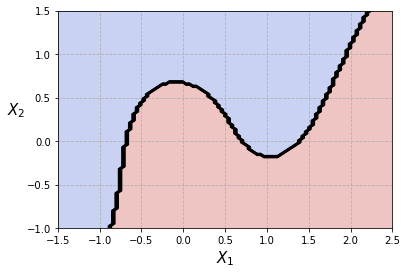

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# 전체 좌표계를 준비한다.
# 가로축은 x1s, 세로축은 x2s이고 두 개의 축에 각각 값이 100개씩 있다.
x1s = np.linspace(-1.5, 2.5, 100)
x2s = np.linspace(-1, 1.5, 100)

# 이제 가로축 x1s와 세로축 x2s의 값들을 조합해서 2차원 평면을 덮을 수 있는 좌표들을 만들 것이다.
# 각 축에 100개씩 값이 존재하므로 전체 점들은 10000개가 나오게 될 것이다.

# 첫 번째 방법 : list comprehension을 이용한다.
# 이렇게 하면 100행 100열의 2차원 배열이 된다.
X = np.array([[i, j] for j in x2s for i in x1s])

# 전체 좌표계를 완성했다. (총 10000개의 점이 존재하게 된다.)
# 이 좌표들을 특성으로 해서 예측을 수행하면,
# 각 점들마다 양성(1) 또는 음성(0)으로 예측 값이 나올 것이다.

# 데이터를 다항식 특성으로 확장할 필요가 있다면 처리를 한 뒤에 예측한다.
X_poly = poly.fit_transform(X)

# 전체 좌표계들을 가지고 예측을 수행한다.
# 특성이 총 10000개의 점이므로 예측 결과값도 10000개가 나온다.
y_pred = clf.predict(X_poly)

# 예측값 y_pred는 단순히 10000개의 원소가 있는 1차원 배열이다.
# 즉, 원본 좌표계 (x1s, x2s) = (100, 100)과 형태가 다르다.
# 따라서 형태를 (100, 100)으로 바꿔서(reshape) 관리해야 한다.

# 위에서 list comprehension을 이용했으므로,
# 다음과 같이 직접 가로축과 세로축의 좌표 개수를 기재하여 형태를 바꾼다.
y_preds = y_pred.reshape(len(x2s), len(x1s))

# 여기까지 진행했으면 (100, 100) 형태의 총 10000개의 점에 대응하는 (100, 100) 형태의 예측값 y_preds가 준비된 것이다.
# y_preds의 값들 중 1은 양성으로, 0은 음성으로 분류가 된 것아다.

# 이후부터는 아래의 셀에 있는 두 번째 방법의 구문들과 동일하다.

# 이제 이 정보를 가지고 y_preds가 1인 영역과 0인 영역의 경계에 곡선을 그려주면(contour) 된다.
# contour 함수는 가로축 X, 세로축 Y 좌표값 이외에 높이축 Z에 해당하는 값들을 인자로 추가한다.
# 이 높이축 Z의 값들을 기준으로 곡선을 그린다.
# 즉, 3차원 데이터를 표현할 때 X축, Y축, Z축이 있는 정육면체 3차원 그래프를 그리는 것이 아니라
# X축, Y축만 있는 2차원 평면에서 Z축의 값을 등고선으로 표현하는 함수이다.
# (여기에서는 높이, 즉 Z축에 해당하는 것이 y_preds이다.
# 이 값이 같은 점들끼리 하나의 영역으로 묶이도록 선을 그려주는 것이다.)
plt.contour(x1s, x2s, y_preds, colors="black")

# 필요하다면, 등고선 자체만 그리지 않고 동일한 높이인 영역들끼리 같은 색상으로 채울 수도(contourf) 있다.
# contourf 함수도 역시 가로축 X, 세로축 Y 외에 높이축 Z이 인자로 추가된다.
# 이 높이에 해당하는 값들이 동일한 것들끼리 동일한 색을 칠해 준다.
# (여기에서는 추가 옵션으로 색상 팔레트를 plt에서 기본 제공하는 coolwarm 세트로 지정하였고,
# 색상의 투명도를 0.3으로 약간 흐리게 표시했다.)
plt.contourf(x1s, x2s, y_preds, cmap=plt.cm.coolwarm, alpha=0.3)

# 좌표계 격자 표시를 한다.
plt.grid(linestyle="--")

# 가로축 및 세로축 서식 표시를 한다.
# 축 서식 문자열의 앞뒤에 $기호를 붙여주면 미리 약속된 몇 가지 스타일을 부가적으로 적용해 줄 수있다.
# (여기에서는 아래첨자 표시를 하도록 지정했다.)
plt.xlabel("$X_1$", fontsize=15)
plt.ylabel("$X_2$", fontsize=15, rotation=0, labelpad=10)

# 가로축과 세로축의 표시 범위를 지정한다.
plt.axis([-1.5, 2.5, -1, 1.5])

# 지금까지 세팅된 플롯을 화면에 디스플레이한다.
plt.show()

### 두 번째 방법 : numpy의 meshgrid를 이용해서 전체 좌표계를 나타내는 배열 조합을 만든다.

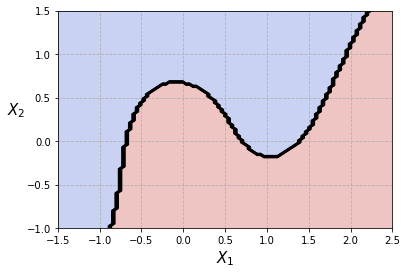

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 전체 좌표계를 준비한다.
# 가로축은 x1s, 세로축은 x2s이고 두 개의 축에 각각 값이 100개씩 있다.
x1s = np.linspace(-1.5, 2.5, 100)
x2s = np.linspace(-1, 1.5, 100)

# 이제 가로축 x1s와 세로축 x2s의 값들을 조합해서 2차원 평면을 덮을 수 있는 좌표들을 만들 것이다.
# 각 축에 100개씩 값이 존재하므로 전체 점들은 10000개가 나오게 될 것이다.

# 두 번째 방법 : numpy의 meshgrid를 이용해서 배열 조합을 만들 수도 있다.
# meshgrid는 2개의 ndarray들 내의 원소들끼리 결합 가능한 모든 조합의 형태를 생성하여 2개의 2차원 배열로 반환한다.
# 조합된 결과로, 가로축의 값들만 들어 있는 2차원 배열과 세로축의 값들만 들어 있는 2차원 배열이 리턴된다
X1, X2 = np.meshgrid(x1s, x2s)

# 따라서 X1은 원래 x1s에 있는 내용이 오른쪽으로 나열되면서, 그것이 x2s의 길이(항목 수)만큼 아래쪽으로 중복 표시되는 형태가 된다.
# 마찬가지로 X2는 원래 x2s에 있는 내용이 아래쪽으로 나열되면서, 그것이 x1s의 길이만큼 오른쪽으로 중복 표시되는 형태가 된다.
# 결과적으로, X1과 X2의 shape은 동일하다.
# 이해가 어렵다면, 위에서 x1s와 x2s의 항목을 아주 간단한 정수 몇 개들로 넣어서 X1과 X2를 출력해 보면 도움이 될 것이다.

# 이 X1과 X2를 각각 1차원 배열로 펴준 뒤에(ravel) 위/아래로 붙이면(vstack) 2행 N열의 2차원 배열이 된다.
# 이 배열의 행과 열을 서로 바꿔주면(transpose) N행 2열이 된다.
# 즉, 가로축 좌표(0번 열)와 세로축 좌표(1번 열)이 있는 점들이 N개 존재하게 된다.
# (여기에서는 이 N의 값이 10000인 것이다.)
X = np.vstack([X1.ravel(), X2.ravel()]).transpose()

# 여기까지 진행했으면 전체 좌표계가 완성된 것이다. (총 10000개의 점이 존재하게 된다.)
# 이 좌표들을 특성으로 해서 예측을 수행하면,
# 각 점들마다 양성(1) 또는 음성(0)으로 예측 값이 나올 것이다.

# 데이터를 다항식 특성으로 확장할 필요가 있다면 처리를 한 뒤에 예측한다.
X_poly = poly.fit_transform(X)

# 전체 좌표계들을 가지고 예측을 수행한다.
# 특성이 총 10000개의 점이므로 예측 결과값도 10000개가 나온다.
y_pred = clf.predict(X_poly)

# 예측값 y_pred는 단순히 10000개의 원소가 있는 1차원 배열이다.
# 즉, 원본 좌표계 (x1s, x2s) = (100, 100)과 형태가 다르다.
# 따라서 형태를 (100, 100)으로 바꿔서(reshape) 관리해야 한다.

# 위에서 numpy의 meshgrid를 이용했으므로,
# 다음과 같이 조합된 배열 X1 또는 X2의 shape 속성 정보를 그대로 이용할 수 있다.
# (아래에서 X1.shape 대신 X2.shape로 해도 동일하다.)
y_preds = y_pred.reshape(X1.shape)

# 여기까지 진행했으면 (100, 100) 형태의 총 10000개의 점에 대응하는 (100, 100) 형태의 예측값 y_preds가 준비된 것이다.
# y_preds의 값들 중 1은 양성으로, 0은 음성으로 분류가 된 것아다.

# 이후부터는 위의 셀에 있는 첫 번째 방법의 구문들과 동일하다.

# 이제 이 정보를 가지고 y_preds가 1인 영역과 0인 영역의 경계에 곡선을 그려주면(contour) 된다.
# contour 함수는 가로축 X, 세로축 Y 좌표값 이외에 높이축 Z에 해당하는 값들을 인자로 추가한다.
# 이 높이축 Z의 값들을 기준으로 곡선을 그린다.
# 즉, 3차원 데이터를 표현할 때 X축, Y축, Z축이 있는 정육면체 3차원 그래프를 그리는 것이 아니라
# X축, Y축만 있는 2차원 평면에서 Z축의 값을 등고선으로 표현하는 함수이다.
# (여기에서는 높이, 즉 Z축에 해당하는 것이 y_preds이다.
# 이 값이 같은 점들끼리 하나의 영역으로 묶이도록 선을 그려주는 것이다.)
plt.contour(x1s, x2s, y_preds, colors="black")

# 필요하다면, 등고선 자체만 그리지 않고 동일한 높이인 영역들끼리 같은 색상으로 채울 수도(contourf) 있다.
# contourf 함수도 역시 가로축 X, 세로축 Y 외에 높이축 Z이 인자로 추가된다.
# 이 높이에 해당하는 값들이 동일한 것들끼리 동일한 색을 칠해 준다.
# (여기에서는 추가 옵션으로 색상 팔레트를 plt에서 기본 제공하는 coolwarm 세트로 지정하였고,
# 색상의 투명도를 0.3으로 약간 흐리게 표시했다.)
plt.contourf(x1s, x2s, y_preds, cmap=plt.cm.coolwarm, alpha=0.3)

# 좌표계 격자 표시를 한다.
plt.grid(linestyle="--")

# 가로축 및 세로축 서식 표시를 한다.
# 축 서식 문자열의 앞뒤에 $기호를 붙여주면 미리 약속된 몇 가지 스타일을 부가적으로 적용해 줄 수있다.
# (여기에서는 아래첨자 표시를 하도록 지정했다.)
plt.xlabel("$X_1$", fontsize=15)
plt.ylabel("$X_2$", fontsize=15, rotation=0, labelpad=10)

# 가로축과 세로축의 표시 범위를 지정한다.
plt.axis([-1.5, 2.5, -1, 1.5])

# 지금까지 세팅된 플롯을 화면에 디스플레이한다.
plt.show()